In [20]:
#colab

# from google.colab import drive
# drive.mount('/content/gdrive')

# import sys
# sys.path.append('/content/gdrive/MyDrive/ajou_ribs/img')

import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as patches
warnings.filterwarnings(action='ignore')

---
# 수학과 201521139 이재학
### Keywords : Frechet distance, interpoint distance
---
### 진행 방식 참고:
<img src="허권논문.jpg" width="300px" height="300px">

- 하려고하는 배경(목적) -> 해결하기 위한 방법론(장단점극복) -> 새로운 방법제안
- 발표 10분

# Contents
- 논문소개                                                
- 배경지식
  - Hausdorff distance  
    (21.10.27 진행)
  - Dynamic Time Warping(DTW)                         
  - Frechet Distance                    
    - Discrete Frechet Distance
    - Frechet Distance vs Discrete Frechet Distance                         
    - Time Complexity  
    (21.11.10 진행)
  - Distance 사이의 비교  
    (21.11.24 진행)
- 활용
  - 다차원프레셰 거리 기반 종단자료 군집분석(MFKmL)
  - 대립생성망의 성능 비교에 대한 연구 (FID)
  - 이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱
- 논문분석
- 참고

---
# 논문 : [computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)    
<br/>
<img src="fd.png" width="400px" height="400px">
<br/> 
- 초록  


  - 임의의 차원에서 곡선의 유사성에 대한 측정을 하기 위해, 곡선의 매개변수화가 가능한 프레셰 거리를 고려한다.<br/>
  - 간선이 각 p,q개인 다각형 P,Q의 프레셰 거리는 O(pqlog(pq))의 runtime으로 구할 수 있다.<br/>
  - 더 나아가, 닫힌 곡선에 대한 프레셰 거리, 비단조 프레셰거리 그리고 기준이 되는 곡선 P가 다른 곡선 Q의 '일부'와의 유사성을 측정하는 프레셰 거리에 대한 변화를 고려해보려한다. 
  
- 서론
  - 실생활에서, 주어진 두 곡선의 거리는 '직관적으로' 두 곡선이 얼마나 '유사한지'로 표현된다.
  - 측정하는 거리로 '하우스 도르프 거리'가 제안된다.

---
# 배경지식
- 1.Hausdorff distance
  - 정의 :
<br/>
<img src="ha_dis.jpg" width="400px" height="400px">
<br/> 
    - 점으로 이루어진 두 집합(point sets) 간의 거리를 결정하는 방법
    
<br/> 

  - 예시 :
<br/>
<img src="hd_ex.jpg" width="500px" height="500px">
<br/>
    - 두 집합 사이의 근접점에서 떨어진 가장 먼 지점을 찾음
<br/>
    - 직관적으로, 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.
<br/>   
<br/>
  - 단점 :
<br/>
<img src="hd_단점.jpg" width="400px" height="400px">
<br/>
    - outlier에 취약
<br/>
    - outlier (x4,y4)을 제외하면 hausdorff 거리는 왼쪽이 훨씬 작음.
<br/>
<img src="논문단점.jpg" width="500px" height="500px">
<br/>
    - 논문에서 제기한 단점 : 두 궤적의 진행 방향이나 모양을 고려하지 않기 때문에  실제 두 궤적의 유사성을 판단하기엔 부적합
    
<br/>

  - 활용1 : 컴퓨터 비전 분야에서 주로 쓰이며, '매칭' 문제 해결을 위해 사용됩니다.
<br/>

<center>OpenCV 에서의 Template Matching</center>

<br/>
<img src="템플릿매칭.jpg" width="500px" height="500px">
<br/>

    - Template Matching : 영상에서 작은 크기의 템플릿 영상과 일치하는 부분을 찾는 기법  
    - 한 템플릿이 기준이기에 속도가 매우 느림  
    - Hausdorff distance를 이용하여, 각 템플릿에 대한 최소의 하우스 도르프 거리를 갖는 이미지 영역은 템플릿을 찾는데 가장 적합한 후보    
  - 활용2 : PostGIS(Geospatial 데이터를 다루는 SQL)
    - PostGIS에서 공간 쿼리를 다룰 때, 공간 위상관계에서 교차하는 객체를 찾아 객체간 거리 산출
    - 거리값이 작을수록 두 건물은 유사한 형상  
    - 거리 산출 수행: ST_HausdorffDistance 함수 실행
<br/>
<img src="postgis.jpg" width="600px" height="600px">
<br/>
  - 활용3 : Python Scipy Library
<br/>
<img src="scipy.jpg" width="600px" height="600px">
<br/>

In [116]:
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])

print(directed_hausdorff(u, v))
print(directed_hausdorff(v, u))

(2.23606797749979, 3, 0)
(3.0, 3, 3)


<br/>
<img src="hdextap.jpg" width="800px" height="800px">
<br/>

---
# 2021.11.10 문헌조사 및 논문정리

## 교수님 피드백

### 1. Hausdorff Distance이 정의 되는 공간? 
- 거리공간의 부분집합의 차원을 자연수에서 음이 아닌 '실수'로 확장한 것  
- 정의 : X와 Y가 비어 있지 않은 메트릭 공간(M,d)의 부분 집합(non-empty sets of points X,Y)일때,  다음과 같이 정의 함
<br/>
<img src="hadd.jpg" width="800px" height="800px">
<br/>

### 2. Dynamic Time Warping(DTW) - 동적시간워핑
<br/>
<img src="ucl.png" width="300px" height="300px">
<br/>  

- 일반적으로 시계열 신호간 유사성을 따질땐 유클리드 거리를 이용
- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 , ※길이가 다른 시계열 분석 불가※

<br/>
<img src="dtw.png" width="500px" height="500px">
<br/>

<br/>
<img src="dtw2.jpg" width="800px" height="800px">
<br/>

- 두개의 시계열 데이터가 있다고 할 때, 그 둘간의 유사도를 알아내기 위한 알고리즘
- 다른 속도, 다른 움직임을 가진 서로 다른 신호(길이도 달라도 됨)의 시간 축에 대한 파장의 유사성 측정  
- Hausdorff distance와 마찬가지로 (패턴)매칭을 해결하기 위한 개념
- 장점: ※서로 다른 길이의 시계열도 유사도 분석가능※ , GPS 데이터 등 다차원 시계열 데이터의 분석 가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많음  
- 예1: 에어컨을 사용할때의 전력패턴을 기록한 뒤 이후에 이상패턴을 감지(ex:무단침입,실수로 냉장고 문 열어둠)
- 예2: 주식데이터 시계열 분석(price momentum)  
- 예3: 자동 음성 인식기술
- 예4: 보행 간 유사도, 생체신호 분석

---

# 알고리즘

<br/>
<img src="dtwdp.jpg" width="500px" height="500px">
<br/>

- 알고리즘 수업때 배운 Dynamic Programming의 방법 -> 위에서의 단점(알고리즘 구현이 어렵고 연산량이 많음)  
- 길이가 서로 다르므로, 적절한 index를 매칭시켜 distance 계산(한 점을 기준으로 euclidean distance가 최소가 되는 포인트를 매칭)

# 오류

<br/>
<img src="dtwd1.jpg" width="500px" height="500px">
<br/>

- 왜곡 정도에 제약을 주지 않으면, 유사하지 않은 시계열들을 유사한 것 처럼 비교할 가능성이 생김

<br/>
<img src="dtwd2.jpg" width="500px" height="500px">
<br/>

- 완전히 다른 데이터(sin, -sin) 들도 시각적으로 인식하는 것에 비해 실제 거리값을 작은 값으로 도출해 유사한 것으로 판단할 가능성이 생김

# 해결방법(Constrainted_DTW)
- Sakoe-Chiba band
- 이타쿠라 패턴(NA값 매칭X)

# 코드예시
- R라이브러리 개발자가 파이썬용으로도 개발

In [5]:
import dtw
import numpy as np

idx1=np.linspace(0,2*np.pi,100)  #0~2π,100등분
idx2=np.linspace(0,np.pi,100)    #0~π,100등분
q1=np.sin(idx1)                   #sin함수 ,0~2π,100등분 
q2=np.cos(idx1)                   #cos함수 ,0~2π,100등분
q3=np.sin(idx2)                  #sin함수 ,0~π,100등분
q4=-np.sin(idx1)                  #-sin함수 ,0~2π,100등분

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



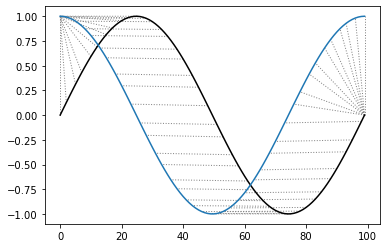

거리:27.26756800768756


In [6]:
# 같은 길이의 sin,cos
dtw.dtw(q1,q2,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q2,keep_internals=True).distance}')

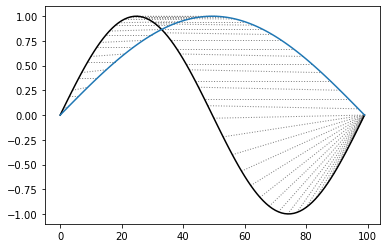

거리:32.52502131040423


In [7]:
# 다른 길이의 sin,sin (다른길이 비교가능)
dtw.dtw(q1,q3,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q3,keep_internals=True).distance}')

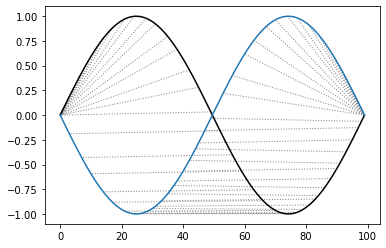

거리:65.00369703277995


In [8]:
# 같은범위의 sin, -sin (비슷한 패턴같아보이지만 정반대)
dtw.dtw(q1,q4,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q4,keep_internals=True).distance}')

---
## 2.Frechet distance
<br/>
<img src="fd.png" width="400px" height="400px">
<br/> 
- 유래 : 수학에서 곡선을 따라 점의 위치와 순서를 고려한 곡선 간의 유사도를 측정 한 것. '모리스 르네 프레셰'의 이름을 따서 명명됨  


- 정의 :
<br/>
<img src="fdd.jpg" width="500px" height="500px">
<br/>

- 변수 :
  - d:거리함수 
  - t : 0~1의 실수범위에서 궤적 A,B를 모든 시점으로 연속 단조증가시키며 전사함(surjection)  
  - α,β : t의 재매개 함수(표준화된 시간 변수)
  - A(α(t)),B(β(t)) : 궤적 A,B에서 시점 α(t),β(t) 에서의 지점

<br/>

- 설명 : 전사된 시점(t)마다 두 궤적 A,B의 지점 간 거리를 함수 d로 측정, 궤적 A,B별로 각각 α,β가 주어지고 α,β가 단조증가 함수라는 특성을 이용함  
<br/>

- 예시 : 주인과 산책하는 개의 목줄

<br/>
<img src="fde1.jpg" width="500px" height="500px">
<br/>

- 목줄로 묶인 개와 같이 산책을 하는 주인의 예시
- 가정: 주인과 개는 서로 다른 속도로 이동가능 하지만 왔던 길을 되돌아 갈 수 는 없음
- 산책하는 동안 주인과 개 사이의 목줄은 목줄이 허용 하는 길이 범위 안에서 서로 다른 궤적을 그리며 이동함
- 이 때, 두 궤적을 그리는 산책이 가능한 최소한의 목줄 길이가 ※프레셰 거리※


<br/>
<img src="fde2.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="fdd.jpg" width="500px" height="500px">
<br/>

- 시점 t를 특정 α,β함수로 재매개한 시점에 의해 매칭되는 두 궤적 A,B상의 지점들마다 거리를 측정하고, 이 중 최대값을 찾는 과정을 모든 가능한 α,β마다 수행했을 때 그 최대값들 중 inf값이 프레셰 거리  
- 다른 관점에서는, 두 궤적 A,B에서 매칭된 지점마다의 거리들 중 최댓값이 INF값이 될 수 있도록 시점(t)을 재매개 하는 특정 α,β를 찾아가는 과정이라고도 볼 수 있음

##  특징
- 하우스 도르프 거리와 다르게 두 궤적의 진행방향이나 모양을 고려하여 계산하기에, 값이 작을 수록 두 궤적은 가갑고 모양도 비슷한 유사궤적이라고 판단가능(논문서론에서 제기한 개선점)  
- 이는 정의에서 단조증가함수인 α,β 가 사용되어 거리의 하한값을 찾는 다는 특성 때문에 두 궤적의 진행방향과 형태에 따른 유사성이 자연스럽게 반영되고 이 특성으로 유사성 지표로 적절하게 활용될 수 있음

<br/>
<img src="fde11.jpg" width="500px" height="500px">
<br/>

- 위의 예시에서 직관적으로 목줄이 짧을 수록 주인과 개의 산책 이동 궤적은 비슷해 질 수 밖에 없음을 알 수 있음

## 활용

<br/>
<img src="fid.jpg" width="500px" height="500px">
<br/>

- GAN을 사용한 모델에서 평가지표로 frechet distance를 활용
- Frechet Inception distance(FID)는 GAN모델에서 생성자 및 판정자 사이의 거리를 측정하는 Inception score에서 측정하는 기준으로 사용되며 이는 유사도의 판단기준으로 작을수록 품질이 좋음

---
## 3.Discrete Frechet Distance
<br/>
<img src="fd.png" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="ddffdd.jpg" width="500px" height="500px">
<br/>
- 유래 : 일반적인 Frechet Distance는 엄밀히는 연속적인 궤적에 적용되는 것으로, 궤적의 양이나 점의 개수가 많을경우 계산이 복잡하다. 따라서, 현실 데이터에 적용이 용이한 이산 프레셰 거리가 널리쓰인다.  

<br/>

- 정의 : Frechet Distance 에서의 근사

<br/>
<img src="dfd.jpg" width="800px" height="800px">
<br/>

- 변수 :
  - P,Q : 궤적
  - u,v : vertices  

<br/>

- 설명 : 
 - 점들의 진행방향을 고려한 점들의 순서집합에서 궤적 P,Q를 커플링한 pair들로 부터 거리를 측정함  
 - Coupling(커플링) : 두 궤적 간에 거리를 측정할 꼭짓점 끼리 쌍을 맺는 것
 
<br/>
<img src="co1.jpg" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="co2.jpg" width="400px" height="400px">
<br/>
    
    
 - Couplig length(커플링 길이) : 커플링 한 쌍 끼리의 거리
 - 커플링은 어느 한쪽 궤적이나 양 쪽 궤적 모두에서 한 칸씩 이동해가며 맺을 수 있지만 뒤로 돌아가거나 한 번에 두 칸 이상 이동할 수 없음
 - 이러한 커플링을 통해 커플링 길이를 최소화하며 마지막 까지 이동했을 때 가장 길었던 커플링 길이가 Discrete Frechet Distance 

- 예시 : 끈으로 묶여있는 징검다리 위 개구리 한 쌍

<br/>
<img src="ffddee1.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="frog2.jpg" width="500px" height="500px">
<br/>    

- 끈으로 묶여있는 두 개구리가 각자 징검다리에 놓여있음  
- 두 개구리는 한번에 한 칸 이동 또는 이동하지 않을 수 있지만, 뒤로 돌아갈 순 없음
- 위의 정의에서 두 개구리의 매 순간 위치의 쌍이 '커플링', 끈 길이가 '커플링 길이'
- 끈의 길이를 최소화 하면서 징검다리의 끝까지 이동했을때, 가장 길었던 길이가 ※discrete frechet distance※
 
<br/>
<img src="dfd.jpg" width="800px" height="800px">
<br/>
    
- 위의 정의에서 궤적 P,Q는 각 징검다리
- vertices u,v는 징검다리 돌
- paris는 끈으로 묶여있는 개구리들의 이동궤적상의 좌표

## 특징
- 관측시점이 일치하지 않아도 계산이 가능하기에, 임상분야와 같이 표본들 간 관측시점을 철저히 통제하기 어려운 분석환경에서도 굉장히 유용할 수 있음

---
## 4.Frechet Distance vs Discrete Frechet Distance

- 기본적인 계산원리는 동일함
- 프레셰 거리는 궤적의 전체구간을 계산하는 반면, 이산 프레셰 거리는 궤적의 전체 구간이 아닌 실제로 관측치가 있는 궤적의 꼭짓점 끼리의 거리만 측정한다는 점에서 차이가 있음

<br/>
<img src="fdvsdfd.jpg" width="800px" height="800px">
<br/>

- 그럼에도, 이산 프레셰 거리는 연속 프레셰 거리에 충분히 근사하는 것으로 알려져 있음

---
### Time Complexity

<br/>
<img src="bigooo.jpg" width="1000px" height="1000px">
<br/>

<center>--> 논문 본문에서 시간복잡도 및 알고리즘 계산<center/> 
    
<br/>
<img src="nm.jpg" width="1000px" height="1000px">
<br/>
    
<center>해당 논문에서는 프레셰 거리에 대한 시간복잡도를 줄이기위해 정확한 값이 아닌 근사를 통한 휴리스틱 알고리즘 제안<center/>    
    
   

---
## Distance 사이의 비교

### Recap
#### Hausdorff distance
<br/>
<img src="ha_dis.jpg" width="400px" height="400px">
<br/> 

##### 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.

#### ED(Euclidean Distance) vs DTW(Dymamic Time Warping)
<br/>
<img src="dtw.png" width="500px" height="500px">
<br/>

##### Euclidean Distance
- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 , ※길이가 다른 시계열 분석 불가※

##### DTW(Dynamic Time Warping)
- 장점: ※서로 다른 길이의 시계열도 유사도 분석가능※ , GPS 데이터 등 다차원 시계열 데이터의 분석 가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많음  

#### Frechet Distance
<br/>
<img src="fde2.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="fdd.jpg" width="500px" height="500px">
<br/>

##### Discrete Frechet Distance

<br/>
<img src="fdvsdfd.jpg" width="800px" height="800px">
<br/>

<br/>
<img src="ffddee1.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="frog2.jpg" width="500px" height="500px">
<br/>   


---

<br/>
<img src="dtwvsdfdnm.jpg" width="800px" height="800px">
<br/>

# <center>↓<center/>

    
<br/>
<img src="dtwvsdfdtb.jpg" width="800px" height="800px">
<br/>

<br/>
<img src="bigooo.jpg" width="1000px" height="1000px">
<br/>

# <center> Hausdorff Distance <center/>
    
    
<br/>
<img src="hdtcink.jpg" width="1000px" height="1000px">
<br/>    

# 라이브러리

In [689]:
import time
import math
import numpy
import pandas as pd

import frechetdist                                      # Discrete Frechet Distance
from frechetdist import frdist                           
import similaritymeasures                               # Frechet Distance
import dtw                                              # DTW
from scipy.spatial import distance                      # Euclidean Distance
from scipy.spatial.distance import directed_hausdorff   # Hausdorff Distance

## 라이브러리 링크
[Frechet Distance](https://pypi.org/project/similaritymeasures/)  
[Dynamic Time Warping](https://pypi.org/project/dtw-python/)  
[Discrete Frechet Distance](https://pypi.org/project/frechetdist/)  
[Euclidean Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)  
[Hausdorff Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html)

# 데이터 : 2009년 서울의 기상

<br/>
<img src="datacsv.jpg" width="800px" height="800px">
<br/>

### 2009-01-01-00시 ~ 2009-12-31-24시 
### 1시간마다  기온,강수량 ,풍속,풍향,습도 등등 측정

<br/>
<img src="datacsvsj.jpg" width="500px" height="500px">
<br/>

### 2009-01-01-00시 ~ 2009-02-28-24시 
### 시계열 데이터 분석을 위해 1월vs2월의 기온(1차원 데이터) 비교

In [673]:
#시간 측정
start = time.time()                    # 시작 시간 저장
 
math.factorial(100000)

print("time :", time.time() - start)   # 최종시간 - 시작시간

time : 0.36412882804870605


In [784]:
climate=pd.read_csv(r"climate.csv")
jan=climate[:747]                             #1월
feb=climate[747:1419]                         #2월

In [785]:
jan.head()

,date,Temp
0,2009-01-01 0:00,-7.6
1,2009-01-01 1:00,-7.8
2,2009-01-01 2:00,-8.1
3,2009-01-01 3:00,-8.5
4,2009-01-01 4:00,-8.8


In [786]:
feb.head()

,date,Temp
747,2009-02-01 0:00,3.8
748,2009-02-01 1:00,3.5
749,2009-02-01 2:00,3.1
750,2009-02-01 3:00,2.1
751,2009-02-01 4:00,2.1


In [787]:
# 결측치 존재하므로 제거
jan=jan.dropna(axis=0)
feb=feb.dropna(axis=0)
# index 동일하게 정렬
feb=feb.reset_index()
feb=feb.drop(columns=["index"])
jan=jan["Temp"]
feb=feb["Temp"]

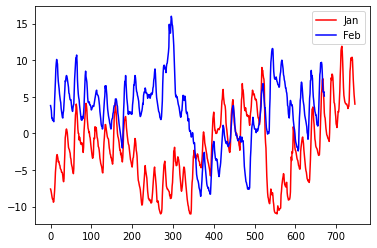

In [688]:
plt.plot(jan,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

### 1월의 기온이 상대적으로 낮고, 일수가 1월이 더 길기에 데이터 길이가 다름

In [692]:
print(f'1월의 길이 : {len(jan)}, 2월의 길이 : {len(feb)}')

1월의 길이 : 744, 2월의 길이 : 672


# 1월의 데이터 개수를 2월에 맞게 수정

In [699]:
jan_eq=jan[:len(feb)]

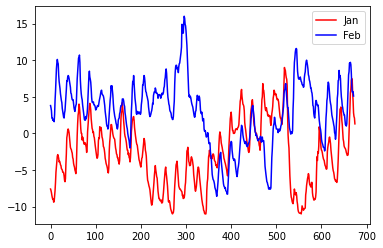

In [698]:
plt.plot(jan_eq,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

# Eulcidean Distance

In [700]:
distance.euclidean(jan,feb)

ValueError: operands could not be broadcast together with shapes (744,) (672,) 

In [697]:
start = time.time()          
print(f'Euclidean Distance : {distance.euclidean(jan_eq,feb)}')
print(f'실행시간 : {time.time() - start}')

Euclidean Distance : 229.9989782586001
실행시간 : 0.000997304916381836


- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름  
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 ※길이가 다른 시계열 분석 불가※

# Hausdorff Distance

In [713]:
directed_hausdorff(jan, feb)

IndexError: tuple index out of range

<br/>
<img src="hdj1ink.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="hdj2.jpg" width="500px" height="500px">
<br/>

In [739]:
type(jan)

pandas.core.series.Series

In [756]:
jan1=pd.Series.to_frame(jan)
feb1=pd.Series.to_frame(feb)
jan1=jan1.reset_index()
feb1=feb1.reset_index()
jan1.head()

,index,Temp
0,0,-7.6
1,1,-7.8
2,2,-8.1
3,3,-8.5
4,4,-8.8


In [757]:
directed_hausdorff(jan1,feb1)

(75.00806623290592, 743, 671)

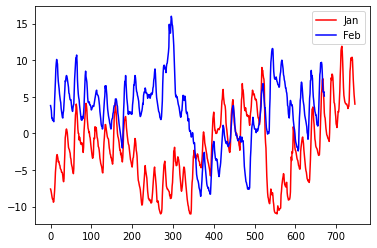

In [758]:
plt.plot(jan,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

## 데이터 개수를 맞추지않고 적용하면 출력은 되지만, 기온이 아닌 날짜별 차이가 적용됨
## sqrt((743번째 -  671 번째)^2 + (743번째 데이터의 기온 - 671번째 데이터의 기온)^2) = 75

In [766]:
jan1_eq=jan1[:672]

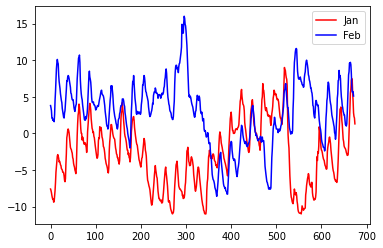

In [768]:
plt.plot(jan_eq,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

In [793]:
#Hausdorff Distance
start = time.time()    
ans=directed_hausdorff(jan1_eq,feb1)
print(f'Hausdorff Distance : {ans[0]}')
print(f'Index : {ans[1:]}')
print(f'실행시간 : {time.time() - start}')

Hausdorff Distance : 19.05885620912231
Index : (292, 283)
실행시간 : 0.005954742431640625


In [792]:
x=292-283
y=jan1_eq["Temp"][292]-feb1["Temp"][283]

print(f'좌표값 계산 : {np.sqrt(x**2+y**2)}')

좌표값 계산 : 19.05885620912231


# DTW

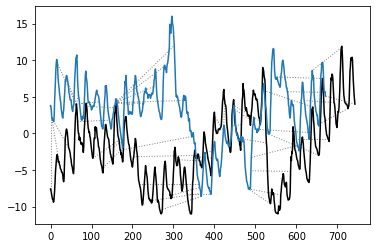

거리:1991.0999999999997
실행시간 : 0.32213902473449707


In [798]:
start = time.time()

dtw.dtw(jan,feb,keep_internals=True).plot(type="twoway")

print(f'거리:{dtw.dtw(jan,feb,keep_internals=True).distance}')
print(f'실행시간 : {time.time() - start}')

- 서로 다른 길이의 시계열 데이터 분석가능  
- 알고리즘 구현이 어렵고 연산량이 많기에 시간이 제일 오래 걸림

# 다차원 데이터 

<br/>
<img src="datacsv.jpg" width="800px" height="800px">
<br/>

### 2009-01-01-00시 ~ 2009-12-31-24시 
### 1시간마다  기온,강수량 ,풍속,풍향,습도 등등 측정

In [800]:
climate_multi=pd.read_csv(r"climate_multi.csv")

In [801]:
climate_multi.head()

,date,temp,Unnamed: 2,wind_power,wind_direction,moisture
0,2009-01-01 0:00,-7.6,NaN,2.1,290.0,55.0
1,2009-01-01 1:00,-7.8,NaN,2.3,320.0,54.0
2,2009-01-01 2:00,-8.1,NaN,2.0,340.0,52.0
3,2009-01-01 3:00,-8.5,NaN,2.4,290.0,52.0
4,2009-01-01 4:00,-8.8,NaN,2.1,320.0,53.0


### 2009-01-01-00시 ~ 2009-02-28-24시 
### 다차원 시계열 데이터 분석을 위해 1월vs2월의 기온,풍량,풍속,습도(4차원 데이터) 비교

In [802]:
climate_multi=climate_multi.drop(columns=["Unnamed: 2"])

In [804]:
jan_multi=climate_multi[:747]
feb_multi=climate_multi[747:1419]
jan_multi=jan_multi.dropna(axis=0)
feb_multi=feb_multi.dropna(axis=0)
feb_multi=feb_multi.reset_index()
jan_multi=jan_multi.drop(columns=["date"])
feb_multi=feb_multi.drop(columns=["date","index"])

In [809]:
jan_multi.head()

,temp,wind_power,wind_direction,moisture
0,-7.6,2.1,290.0,55.0
1,-7.8,2.3,320.0,54.0
2,-8.1,2.0,340.0,52.0
3,-8.5,2.4,290.0,52.0
4,-8.8,2.1,320.0,53.0


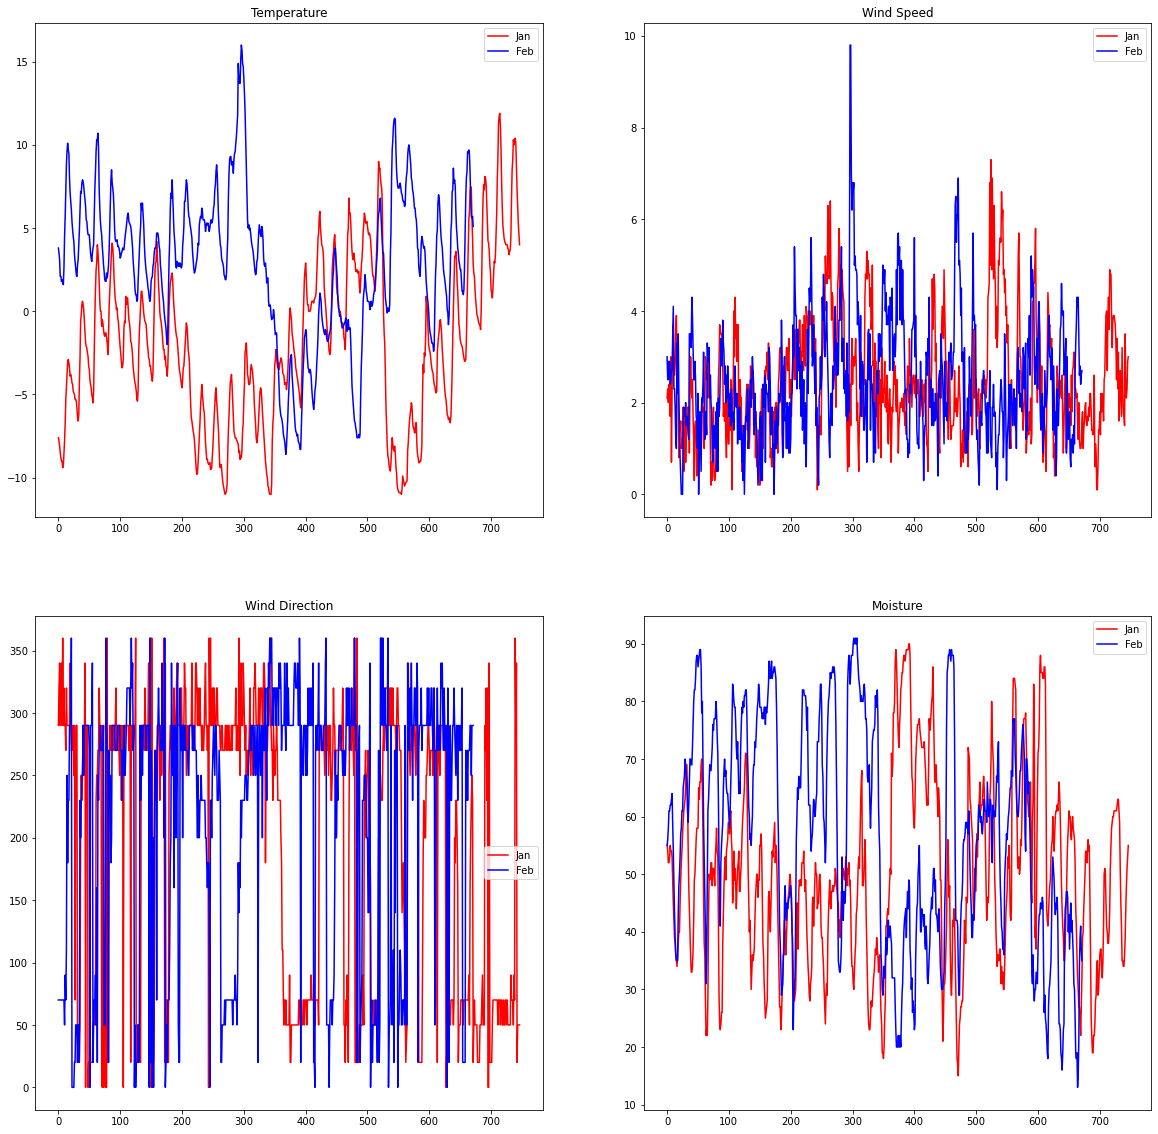

In [811]:
fig,ax=plt.subplots(
2, 2 , figsize=(20,20))

ax[0,0].plot(jan_multi["temp"],color='r')
ax[0,0].plot(feb_multi["temp"],color='b')
ax[0,0].legend(["Jan","Feb"])

ax[0,1].plot(jan_multi["wind_power"],color='r')
ax[0,1].plot(feb_multi["wind_power"],color='b')
ax[0,1].legend(["Jan","Feb"])

ax[1,0].plot(jan_multi["wind_direction"],color='r')
ax[1,0].plot(feb_multi["wind_direction"],color='b')
ax[1,0].legend(["Jan","Feb"])

ax[1,1].plot(jan_multi["moisture"],color='r')
ax[1,1].plot(feb_multi["moisture"],color='b')
ax[1,1].legend(["Jan","Feb"])

ax[0, 0].set_title("Temperature")
ax[0, 1].set_title("Wind Speed")
ax[1, 0].set_title("Wind Direction")
ax[1, 1].set_title("Moisture")


plt.show()

# 변수 별 DTW

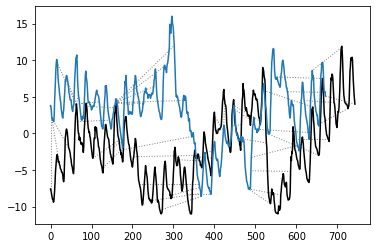

기온 DTW:1991.0999999999997


In [827]:
dtw.dtw(jan_multi["temp"],feb_multi["temp"],keep_internals=True).plot(type="twoway")
print(f'기온 DTW:{dtw.dtw(jan_multi["temp"],feb_multi["temp"],keep_internals=True).distance}')

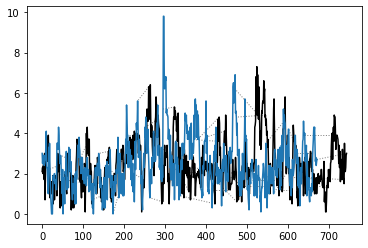

풍속 DTW:477.9


In [830]:
dtw.dtw(jan_multi["wind_power"],feb_multi["wind_power"],keep_internals=True).plot(type="twoway")
print(f'풍속 DTW:{dtw.dtw(jan_multi["wind_power"],feb_multi["wind_power"],keep_internals=True).distance}')

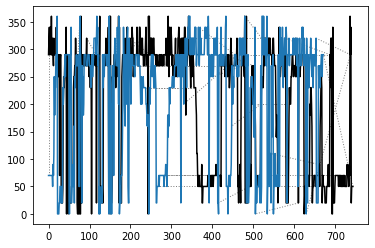

풍향 DTW:30930.0


In [831]:
dtw.dtw(jan_multi["wind_direction"],feb_multi["wind_direction"],keep_internals=True).plot(type="twoway")
print(f'풍향 DTW:{dtw.dtw(jan_multi["wind_direction"],feb_multi["wind_direction"],keep_internals=True).distance}')

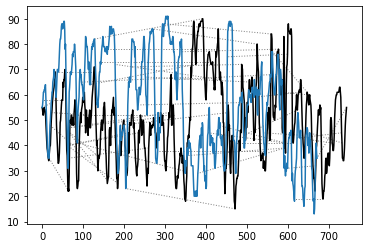

습도 DTW:6274.0


In [832]:
dtw.dtw(jan_multi["moisture"],feb_multi["moisture"],keep_internals=True).plot(type="twoway")
print(f'습도 DTW:{dtw.dtw(jan_multi["moisture"],feb_multi["moisture"],keep_internals=True).distance}')

# 다차원 DTW

In [829]:
start = time.time()

print(f'거리:{dtw.dtw(jan_multi,feb_multi,keep_internals=True).distance}')
print(f'실행시간 : {time.time() - start}')

거리:47375.732863482015
실행시간 : 0.04786944389343262


- 1991 + 478 + 30930 + 6274 ≠ 47375  
- DTW는 길이가 서로 다른 데이터에서 적절한 index를 매칭시켜 거리를 계산(한 점을 기준으로 Eulidean Distance가 최소가 되는 포인트 매칭)  
- 따라서, Eulidean Distance의 정의에서 루트 안에 값이 들어가므로, 누적합과는 값이 다름


# Frechet Distance

In [846]:
jan_fd=pd.Series.to_numpy(jan)      
# 길이가 달라도 연산이 가능하지만 길이가 다른 인덱스는 의미없는 값이라 길이는 같음
jan_eq_fd=pd.Series.to_numpy(jan_eq)
feb_fd=pd.Series.to_numpy(feb)

In [851]:
start = time.time()
fd_ans=similaritymeasures.frechet_dist(jan_eq_fd,feb_fd)

print(f'Frechet Distance:{fd_ans}')
print(f'실행시간 : {time.time() - start}')

Frechet Distance:11.399999999999999
실행시간 : 13.471193552017212


# Discrete Frechet Distance

In [878]:
jan_dfd=climate[:747]                             
feb_dfd=climate[747:1419] 
jan_dfd=jan_dfd.dropna(axis=0)
feb_dfd=feb_dfd.dropna(axis=0)
feb_dfd=feb_dfd.reset_index()
jan_dfd=jan_dfd.drop(columns=["date"])
feb_dfd=feb_dfd.drop(columns=["index","date"])
jan_dfd_eq=jan_dfd[:len(feb_dfd)]

In [883]:
start = time.time()
dfd_ans=frdist(jan_dfd_eq,feb_dfd)

print(f'Discrete Frechet Distance:{dfd_ans}')
print(f'실행시간 : {time.time() - start}')

Discrete Frechet Distance:11.399999999999999
실행시간 : 7.3604700565338135


- 기본적인 계산원리는 동일  
- 프레셰 거리는 궤적의 전체구간을 계산하는 반면, 이산 프레셰 거리는 궤적의 전체 구간이 아닌 실제로 관측치가 있는 궤적의 꼭짓점 끼리의 거리만 측정한다는 점에서 차이가 있음  
- 그럼에도 이산 프레셰 거리는 연속 프레셰 거리에 충분히 근사하는 것으로 알려져 있음  
- 결과에선 값의 차이가 없음, 라이브러리 마다 알고리즘의 시간이 다르겠지만 DFD가 확실히 빠름


---
# TODO

- 논문분석
- multinomial 논문
- Interpoint 논문
- Frechet Inception Distance , Inception model -> FID Python code

---
# <참고>

[유튜브 : GAN 성능의 정량적 평가 방법 - Python, Deep Learning](https://www.youtube.com/watch?v=19An2T4utEM)


# <논문>
### 메인
[computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)
### 참고
[이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱](http://www.dbpia.co.kr.ssl.openlink.ajou.ac.kr/search/topSearch?startCount=0&collection=ALL&range=A&searchField=ALL&sort=RANK&query=%EC%9D%B4%EC%82%B0+%ED%94%84%EB%A0%88%EC%85%B0&srchOption=*&includeAr=false)  
[다차원 프레셰 거리 기반 종단자료 군집분석](https://dcoll.ajou.ac.kr/dcollection/srch/srchDetail/000000030579)  
[대립생성망의 성능 비교에 대한 연구](https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE07540262)  
[The Frechet Distance between Multivariate Normal Distributions](https://www.sciencedirect.com/science/article/pii/0047259X8290077X)  
[Interpoint distances: Applications, properties, and visualization](https://onlinelibrary.wiley.com/doi/abs/10.1002/asmb.2508)
[products of Euclidean metrics and applications to proximity questions among curves](https://arxiv.org/abs/1712.06471)  

# <개념>
#### Hausdorff distance
[Hausdorff distance](https://progworks.tistory.com/72)  
[Hausdorff distance 개념](https://dhpark1212.tistory.com/entry/Hausdorff-Distance)  
[Template Matching](https://velog.io/@codren/%ED%85%9C%ED%94%8C%EB%A6%BF-%EB%A7%A4%EC%B9%AD)

#### Dynamic Time Warping
[DTW Youtube](https://www.youtube.com/watch?v=03J4xzymOWM)   
[DTW tistory1](https://hamait.tistory.com/862)  
[DTW tistory2](https://leo-bb.tistory.com/58)  

#### Frechet distance
[유튜브 : Frechet Distance Between Two Point Sets](https://www.youtube.com/watch?v=12vrDDBnEFg)  
[위키피디아](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance)   